In [1]:
## A Company is having its offices across all locations of India. These locations are categorized with respect to zones. 
## The company has decided to give medical expenditure benefits to their employees. 
## The company has collected the medical expenditure of all the employees for the year 2019
## The company also collected some other health and family related data of all employees like number of dependents,
## age, bmi, smoking and alcoholic habits.
## Answer the following questions to provide insight into the collected dat.

In [6]:
##  Read the dataset and do primary study of data. Perform following steps:  
## a. Reading some rows of dataset
## b. Learn data types of all features
## c. See the statistical properties of the data.

In [226]:
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
df=pd.read_csv("emp_health.csv")
df.head(5)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1338 non-null   object 
 1   age          1338 non-null   int64  
 2   sex          1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   dependent    1338 non-null   int64  
 5   alcohol      1338 non-null   object 
 6   smoke        1338 non-null   object 
 7   zone         1338 non-null   object 
 8   expenditure  1338 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


In [14]:
df.describe()

,age,bmi,dependent,expenditure
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### 1. How many employees above 50 age smoke, what is their average expenditure on health management?

In [36]:
df_age_smoke=df[(df['age']>50)&(df['smoke']=='yes')]
print(df_age_smoke.count().values[0],' Employees above 50 age smoke')

64  Employees above 50 age smoke


In [40]:
print("Average expenditure on health management is: Rs ",df_age_smoke['expenditure'].mean())

Average expenditure on health management is: Rs  38820.22308234375


#### 2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?

In [50]:
print("Total Female Employees are: ",df[df['sex']=='female'].count().values[0])

Total Female Employees are:  662


In [56]:
df_female=df[df['sex']=='female']
print(df_female[df_female['alcohol']!='daily'].count().values[0],'Female Employees did not consume alcohol daily')

453 Female Employees did not consume alcohol daily


In [77]:
print('Proportion of female employees who did not consume alcohol daily with respect to Total feamle employees is: ',
    round((df_female[df_female['alcohol']!='daily'].count().values[0]/ df[df['sex']=='female'].count().values[0])*100,2),'%')

Proportion of female employees who did not consume alcohol daily with respect to Total feamle employees is:  68.43 %


####  3. Display zone wise average expenditure of employees on health

In [81]:
print("zone wise average expenditure of employees on health :\n",df.groupby('zone')['expenditure'].mean())

zone wise average expenditure of employees on health :
 zone
east         13774.679941
north        14102.583403
northeast    13694.721724
northwest    12151.702619
south        14715.689519
southeast    14452.949680
southwest    12717.083869
west         12182.998872
Name: expenditure, dtype: float64


#### 4. Employees of which zone did maximum expenditure on health

In [93]:
df.groupby('zone')['expenditure'].sum().sort_values(ascending=False).head(1)

zone
east    3.608966e+06
Name: expenditure, dtype: float64

#### 5. What is the minimum expenditure done by any employee in organization

In [101]:
min_exp=df['expenditure'].min()
print("Minimum expenditure done by any employee in organization is: ",min_exp)

Minimum expenditure done by any employee in organization is:  1121.8739


#### 6. What is average expenditure of employees who have 2 or lesser dependents

In [109]:
less_dependent=df[df['dependent']<=2]
print("Average expenditure of employees who have 2 or lesser dependents is: ",round(less_dependent['expenditure'].mean(),2))

Average expenditure of employees who have 2 or lesser dependents is:  13040.97


####  7. How many employees are below age of 20 years. What is their average BMI

In [126]:
age_20=df[df['age']<20]
print(age_20.count().values[0],"Employees are below age of 20 years and their avg BMI is:",round(age_20['bmi'].mean(),2))

137 Employees are below age of 20 years and their avg BMI is: 29.97


####  8. Create a dataframe "non_smoker" for all non-smoker male employees

In [129]:
non_smoker=df[(df['sex']=='male')&(df['smoke']=='no')]
non_smoker

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...,...
1324,i11336,31,male,25.935,1,daily,no,west,4239.89265
1325,i11337,61,male,33.535,0,party,no,east,13143.33665
1327,i11339,51,male,30.030,1,daily,no,southeast,9377.90470
1329,i11341,52,male,38.600,2,party,no,southwest,10325.20600


####  9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [130]:
non_alcoholic=df[(df['sex']=='male')&(df['alcohol']=='no')]
non_alcoholic

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630
...,...,...,...,...,...,...,...,...,...
1291,i11303,19,male,34.900,0,no,yes,southwest,34828.65400
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1310,i11322,42,male,26.315,1,no,no,west,6940.90985
1320,i11332,31,male,31.065,3,no,no,west,5425.02335


#### 10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. The dataframe should contain columns id, smoke, alcohol  (Hint:Use join and dataframes created in Q8 and Q9)


In [144]:
data1=non_smoker[['id','alcohol']]
data2=non_alcoholic[['id','smoke']]

In [146]:
non_smoking_alcoholic=pd.merge(data1,data2,how='inner',on='id')
non_smoking_alcoholic

,id,alcohol,smoke
0,i10030,no,no
1,i10036,no,no
2,i10040,no,no
3,i10049,no,no
4,i10079,no,no
...,...,...,...
104,i11273,no,no
105,i11282,no,no
106,i11322,no,no
107,i11332,no,no


####  11.What is the count for each zone with respect to number of dependent

In [180]:
count=df.groupby(['dependent','zone']).count()['id']
c=pd.DataFrame(count)
c.rename({'id':'Count'},axis=1)

Count
dependent zone            
0         east         124
          north         26
          northeast     35
          northwest     70
          south         38
          southeast     81
          southwest    116
          west          84
1         east          65
          north         20
          northeast      9
          northwest     28
          south         21
          southeast     57
          southwest     53
          west          71
2         east          42
          north         10
          northeast     15
          northwest     30
          south         12
          southeast     38
          southwest     44
          west          49
3         east          22
          north         12
          northeast     13
          northwest     13
          south         12
          southeast     15
          southwest     25
          west          45
4         east           6
          north          1
          northeast      2
          northwest      4
          south          1
          southeast      2
          southwest      6
          west           3
5         east           3
          north          1
          southeast      5
          southwest      7
          west           2

#### 12. Classify the employees into 3 categories.
##### Category 1 : employees below 18.5 bmi - underweight
##### Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit
##### Category 3 : employee with bmi over 24.9 - overweight
##### What is the average expenditure of employees in each category.
##### Display the bar chart for the same


In [200]:
underweight = df[df['bmi']<18.5][['bmi','expenditure']]
underweight.head(5)

,bmi,expenditure
28,17.385,2775.19215
128,17.765,32734.18630
172,15.960,1694.79640
198,18.050,9644.25250
232,17.800,1727.78500


In [214]:
underweight_exp=underweight['expenditure'].mean()
print("Avg expenditure of underweight employees is: ",round(underweight_exp,2))

Avg expenditure of underweight employees is:  8852.2


In [230]:
fit = df[(df['bmi']>=18.5) & (df['bmi']<=24.9)][['bmi','expenditure']]
fit.head(5)

,bmi,expenditure
3,22.705,21984.47061
15,24.600,1837.23700
17,23.845,2395.17155
26,23.085,14451.83515
35,20.425,1625.43375


In [231]:
fit_exp=fit['expenditure'].mean()
print("Avg expenditure of Fit employees is: ",round(fit_exp,2))

Avg expenditure of Fit employees is:  10379.5


In [203]:
overweight = df[df['bmi']>24.9][['bmi','expenditure']]
overweight.head(5)

,bmi,expenditure
0,27.90,16884.9240
1,33.77,1725.5523
2,33.00,4449.4620
4,28.88,3866.8552
5,25.74,3756.6216


In [216]:
overweight_exp=overweight['expenditure'].mean()
print("Avg expenditure of overweight employees is: ",round(overweight_exp,2))

Avg expenditure of overweight employees is:  13936.62


In [225]:
exp_data=pd.DataFrame([['Underweight',8852.2],['Fit',10379.5],['overweight_exp',13936.62]],
                      columns=['BMI Category','AVG BMI'])
exp_data

,BMI Category,AVG BMI
0,Underweight,8852.20
1,Fit,10379.50
2,overweight_exp,13936.62


<AxesSubplot:xlabel='BMI Category', ylabel='AVG BMI'>

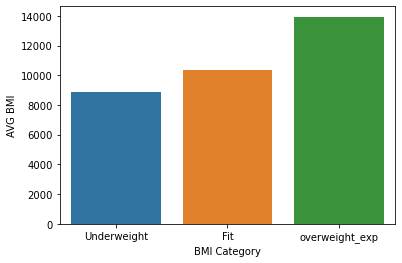

In [227]:
sns.barplot(x=exp_data['BMI Category'],y=exp_data['AVG BMI'])

####  13. Draw line plot of expenditure against age and BMI

<AxesSubplot:xlabel='age', ylabel='expenditure'>

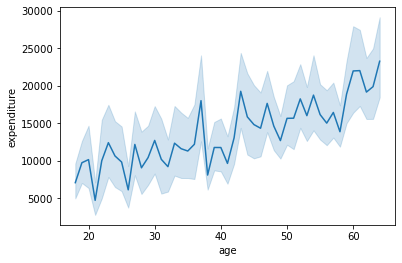

In [233]:
sns.lineplot(x=df['age'],y=df['expenditure'])

<AxesSubplot:xlabel='bmi', ylabel='expenditure'>

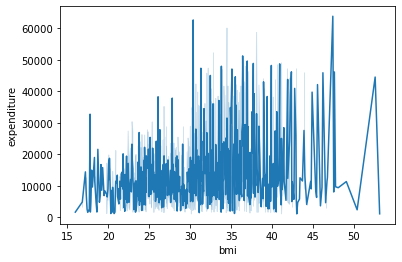

In [234]:
sns.lineplot(x=df['bmi'],y=df['expenditure'])

####  14. Draw a bar chart to show zone wise average expenditure

<AxesSubplot:xlabel='zone', ylabel='expenditure'>

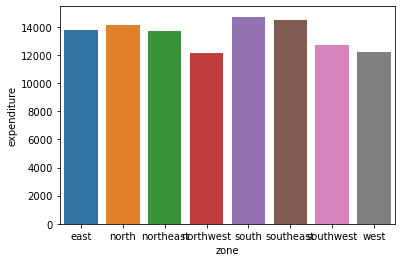

In [242]:
exp_zone=df.groupby('zone')['expenditure'].mean()
exp_zone=pd.DataFrame(exp_zone,columns=['expenditure'])
exp_zone
sns.barplot(x=exp_zone.index,y=exp_zone['expenditure'])

#### 15. Draw a bar chart to show smoking and alcoholic habits against average expenditure

<AxesSubplot:xlabel='alcohol', ylabel='expenditure'>

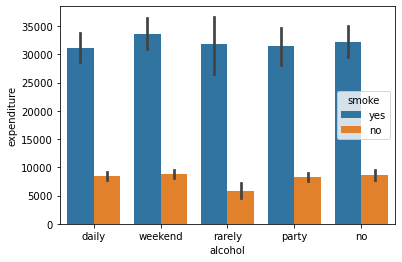

In [250]:
Smok_alc_exp=df[['smoke','alcohol','expenditure']]
Smok_alc_exp
sns.barplot(x='alcohol',hue='smoke',y='expenditure',data=Smok_alc_exp)

 ##### 16. Draw pie chart for alcohol consumption habits

In [255]:
import matplotlib.pyplot as plt

In [263]:
pie_plot=df.groupby('alcohol').count()['id']
pie_plot

alcohol
daily      395
no         259
party      278
rarely      59
weekend    347
Name: id, dtype: int64

<AxesSubplot:ylabel='id'>

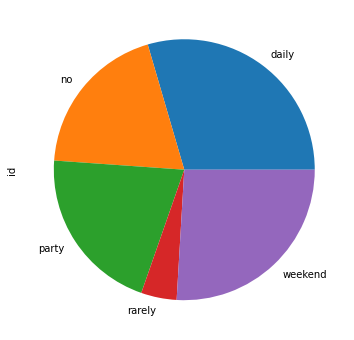

In [266]:
pie_plot.plot.pie(figsize=(11, 6))

####  17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

<AxesSubplot:xlabel='age', ylabel='expenditure'>

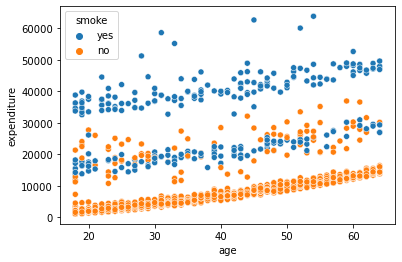

In [267]:
sns.scatterplot(x=df['age'],y=df['expenditure'],hue=df['smoke'])

####  18. Draw distribution plot of expenditure

C:\Users\Adwait\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='expenditure', ylabel='Density'>

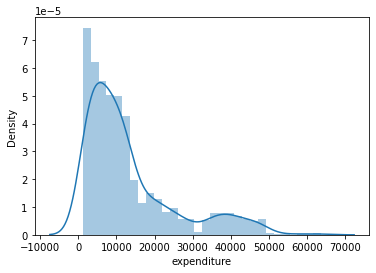

In [271]:
sns.distplot(df['expenditure'])

####  19. Display the pairplot

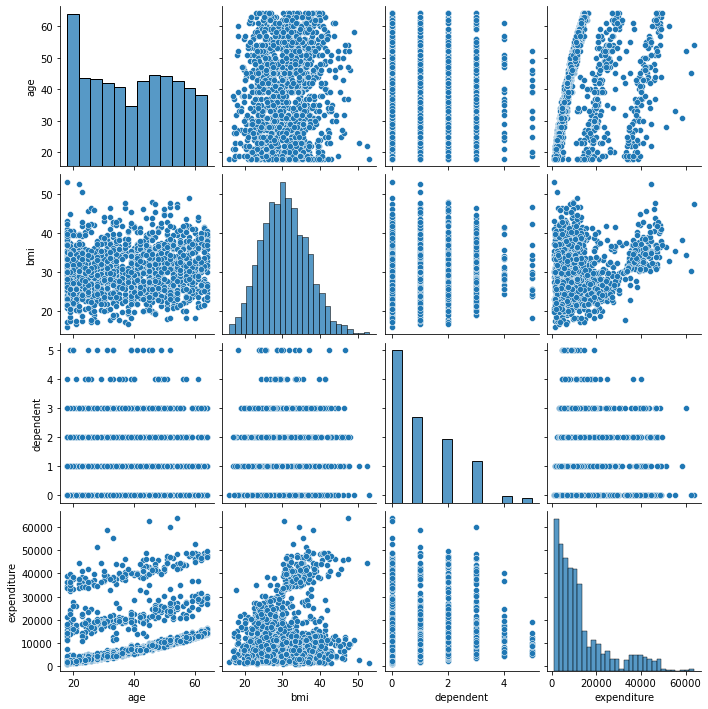

In [272]:
sns.pairplot(df)

#### 20. Display heatmap for the data

<AxesSubplot:>

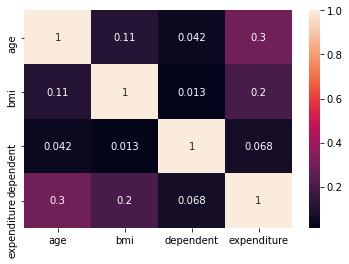

In [282]:
corelation=df.corr()
sns.heatmap(corelation,annot = True)